## Step 1: Setup and import Data

In [1]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
iris = load_iris()

In [3]:
for key in iris:
    print(key)

data
target
frame
target_names
DESCR
feature_names
filename
data_module


In [6]:
# using the data only (since we don't need targets, unsupervised)
# to know more about iris refer Iris dataset notes

X = iris.data

print(X.shape, "150 samples, 4 features")

(150, 4) 150 samples, 4 features


In [12]:
df = pd.DataFrame(X, columns = iris.feature_names)
df.head(150)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## Step 2: fit KMeans

since there are just 3 species (setosa, versicolor, virginica) therefore lets set k = 3

In [14]:
kmeans = KMeans( n_clusters = 3, random_state = 11, n_init = 10)
kmeans.fit(X)

C:\Users\Shiv\Softwares\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, n_init=10, random_state=11)

<b>Note</b> \
ignore the warning, memory leak for MKL only happens on very large dataset in windows

## Step 3: inspect results

In [15]:
labels = kmeans.labels_
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [25]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


<b> Why is the labels of setosa and versicolor is exchanged ?</b> \
It's just normal in clustering \
Since K means is unsupervised, so it doesn't know about the true labels (iris.target)

In [20]:
centroids = kmeans.cluster_centers_
print(centroids, end='\n\n')

print(centroids.shape, "3 centroids, with 4 dimensions")

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]

(3, 4) 3 centroids, with 4 dimensions


In [21]:
inertia = kmeans.inertia_
print(inertia)

78.85144142614601


## Step 4: Visualise the clustering

plotting just sepal length and sepal width features

In [26]:
cluster_names = ['versicolor', 'setosa', 'virginica']

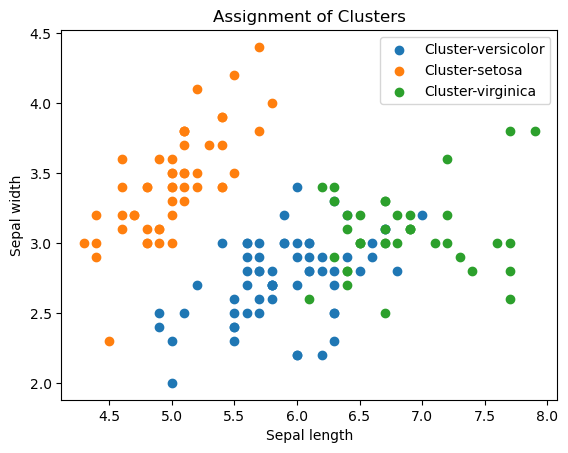

In [31]:
for i in range(3):
    plt.scatter(X[labels == i, 0], X[labels==i, 1], label= f"Cluster-{cluster_names[i]}")

plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.title("Assignment of Clusters")
plt.legend()
plt.show()

## (optional) Step 5: compare with true species (though not used in unsupervised)

In [32]:
true_labels = iris.target

# cross tab to see how clusters align with species
pd.crosstab(labels, true_labels)

col_0,0,1,2
row_0,,,
0,0,48,14
1,50,0,0
2,0,2,36
